<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/Ejercicio_b%C3%A1sico_de_conjunto_de_%C3%A1rboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [5]:
filename = "/content/drive/MyDrive/Data CodingDojo/Boston_Housing_from_Sklearn.csv"
df = pd.read_csv(filename)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


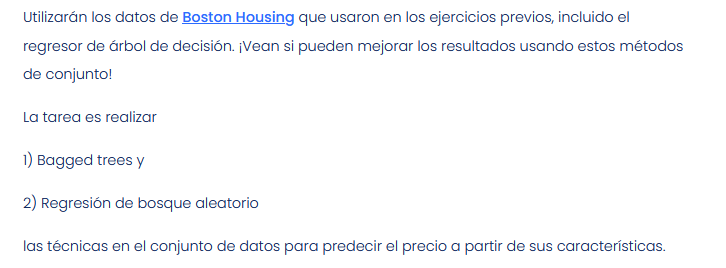

#1. Bagged  Trees

In [6]:
X = df.drop("PRICE", axis=1)

y = df["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

### Crear instancia de modelo Bagging Tree

In [7]:
bagreg = BaggingRegressor(random_state = 42)

In [8]:
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

### Evaluacion de rendimiento

resultados por defecto

In [32]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9606756023782893
0.8204208271364619


El mejor resultado se obtiene con el n_estimator 8

In [30]:
bagreg_x = BaggingRegressor(random_state = 42, n_estimators= 8)
bagreg_x.fit(X_train, y_train)
bagreg_x_train_score = bagreg_x.score(X_train, y_train)
bagreg_x_test_score = bagreg_x.score(X_test, y_test)
print(bagreg_x_train_score)
print(bagreg_x_test_score)

0.9646123141098938
0.8379219949320379


In [83]:
# Lista de valores a probar para n_estimators:
n_estimators_1 = list(range(2, 11))
# Lista para almacenar la puntuación para cada valor de n_estimators:
r2_1 = []
for x in n_estimators_1:
    bagreg_x = BaggingRegressor(n_estimators = x, 
                             random_state = 42)
    bagreg_x.fit(X_train, y_train)
    score = bagreg_x.score(X_test, y_test)
    r2_1.append(score)
max(r2_1)

0.8379219949320379

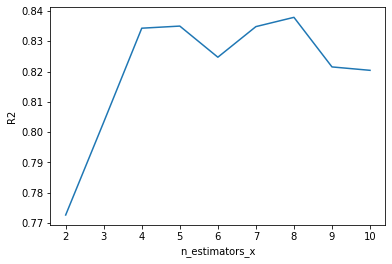

In [84]:
import matplotlib.pyplot as plt
plt.plot(n_estimators_1, r2_1)
plt.xlabel('n_estimators_x')
plt.ylabel('R2');

#2. Regresion de bosque aleatorio

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf = RandomForestRegressor(random_state = 42)

In [70]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Evaluar rendimiento, configuracion por defecto


In [82]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

0.9771342521069045
0.8338530730048258


busqueda de n_estimators optimo

In [100]:
# Lista de valores a probar para n_estimators:
n_estimators_2 = list(range(50, 55))
# Lista para almacenar la puntuación para cada valor de n_estimators:
r2_2 = []
for x in n_estimators_2:
    rf_x = RandomForestRegressor(n_estimators = x, 
                             random_state = 42)
    rf_x.fit(X_train, y_train)
    score = rf_x.score(X_test, y_test)
    r2_2.append(score)
max(r2_2)

0.8383435665812522

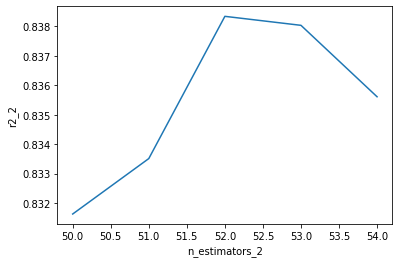

In [101]:
plt.plot(n_estimators_2, r2_2)
plt.xlabel('n_estimators_2')
plt.ylabel('r2_2');

In [110]:
rf_x = RandomForestRegressor(random_state = 42, n_estimators=52, max_depth= 16)
rf_x.fit(X_train, y_train)
rf_x_train_score = rf_x.score(X_train, y_train)
rf_x_test_score = rf_x.score(X_test, y_test)
print(rf_x_train_score)
print(rf_x_test_score)

0.9743208123595688
0.8434085806565629


In [111]:
print(rf_train_score)
print(rf_test_score)
print(rf_x_train_score)
print(rf_x_test_score)

0.9771342521069045
0.8338530730048258
0.9743208123595688
0.8434085806565629


busqueda max_depth optima

In [107]:
# Lista de valores a probar para max_depth:
max_depth = list(range(2, 20))
# Lista para almacenar la puntuación para cada valor de max_depth:
r2_depth = []
for x in max_depth:
    rf_x = RandomForestRegressor(max_depth = x,
                                 n_estimators = 52, 
                             random_state = 42)
    rf_x.fit(X_train, y_train)
    score = rf_x.score(X_test, y_test)
    r2_depth.append(score)

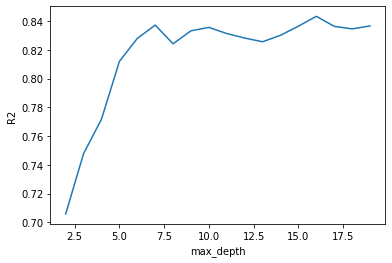

In [109]:
plt.plot(max_depth, r2_depth)
plt.xlabel('max_depth')
plt.ylabel('R2');